# Clustering Crypto

In [29]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from path import Path


### Fetching Cryptocurrency Data

In [30]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"
response = requests.get(url).json()

In [31]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.
df = pd.DataFrame(response['Data']).T
df.head()


,Algorithm,AssetLaunchDate,AssetTokenStatus,BlockNumber,BlockReward,BlockTime,BuiltOn,CoinName,ContentCreatedOn,DecimalPoints,...,PlatformType,ProofType,Rating,SmartContractAddress,SortOrder,Sponsored,Symbol,Taxonomy,TotalCoinsMined,Url
42,Scrypt,0000-00-00,N/A,0,0,0,NaN,42 Coin,1427211129,NaN,...,NaN,PoW/PoS,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,34,False,42,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",0,/coins/42/overview
300,N/A,2017-07-01,N/A,0,0,0,ETH,300 token,1517935016,18,...,token,N/A,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",0xaec98a708810414878c3bcdf46aad31ded4a4557,2212,False,300,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",300,/coins/300/overview
365,X11,0000-00-00,N/A,0,0,0,NaN,365Coin,1480032918,NaN,...,NaN,PoW/PoS,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,916,False,365,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",0,/coins/365/overview
404,Scrypt,0000-00-00,N/A,0,0,0,NaN,404Coin,1466100361,NaN,...,NaN,PoW/PoS,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,602,False,404,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",0,/coins/404/overview
433,N/A,NaN,Finished,NaN,NaN,NaN,NaN,433 Token,1541597321,NaN,...,NaN,N/A,"{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",NaN,3505,False,433,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...",NaN,/coins/433/overview


In [32]:
# Alternatively, use the provided csv file:
file_path = Path("Resources/crypto_data.csv")
df=pd.read_csv(file_path, index_col = 'Unnamed: 0')
# Create a DataFrame
df.columns

Index(['CoinName', 'Algorithm', 'IsTrading', 'ProofType', 'TotalCoinsMined',
       'TotalCoinSupply'],
      dtype='object')

### Data Preprocessing

In [33]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
df = df[['CoinName', 'Algorithm', 'IsTrading', 'ProofType','TotalCoinsMined', 'TotalCoinSupply']]
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [34]:
# Keep only cryptocurrencies that are trading
df = df[df['IsTrading'] == True]
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [35]:
# Keep only cryptocurrencies with a working algorithm
df = df[df["Algorithm"] != "N/A"]
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [36]:
# Remove the 'IsTrading' column
df = df.drop(columns = ['IsTrading'],  axis =1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [37]:
# Remove rows with at least 1 null value
df = df.dropna()


In [38]:
# Remove rows with cryptocurrencies having no coins mined
df = df[(df["TotalCoinsMined"] > 0) ]
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [39]:
# Drop rows where there are 'N/A' text values
df[df.ProofType.str.contains('N/A')]


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply


In [40]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df 
crypto_df = pd.DataFrame(df["CoinName"], index = df.index)
crypto_df.head()


,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [41]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
df = df.drop(columns = ['CoinName'],  axis =1)
df.head()


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [42]:
# Create dummy variables for text features
#use get_dummies here
X = pd.get_dummies(df, columns = ["Algorithm", "ProofType"])



In [43]:
# Standardize data
data_scaled = StandardScaler().fit_transform(X)


### Reducing Dimensions Using PCA

In [44]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(data_scaled)

In [45]:
# Create a DataFrame with the principal components data
pcs_df = pd.DataFrame(
    data= crypto_pca, columns=["PC 1", "PC 2", "PC3"], index = crypto_df.index
)
pcs_df.head()


,PC 1,PC 2,PC3
42,-0.325685,1.038485,-0.475126
404,-0.309051,1.038604,-0.475761
1337,2.298189,1.630352,-0.674014
BTC,-0.139975,-1.294526,0.165092
ETH,-0.157615,-2.001870,0.255811


### Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [46]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")


C:\Users\Omotara\anaconda3\envs\pyvizenv1\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [47]:
# Initialize the K-Means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df= pd.concat([df, pcs_df], axis =1 , sort = False)
clustered_df['CoinName'] = crypto_df["CoinName"]
clustered_df['Class'] = model.labels_
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.325685,1.038485,-0.475126,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.309051,1.038604,-0.475761,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.298189,1.630352,-0.674014,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.139975,-1.294526,0.165092,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.157615,-2.001870,0.255811,Ethereum,0


### Visualizing Results

#### 3D-Scatter with Clusters

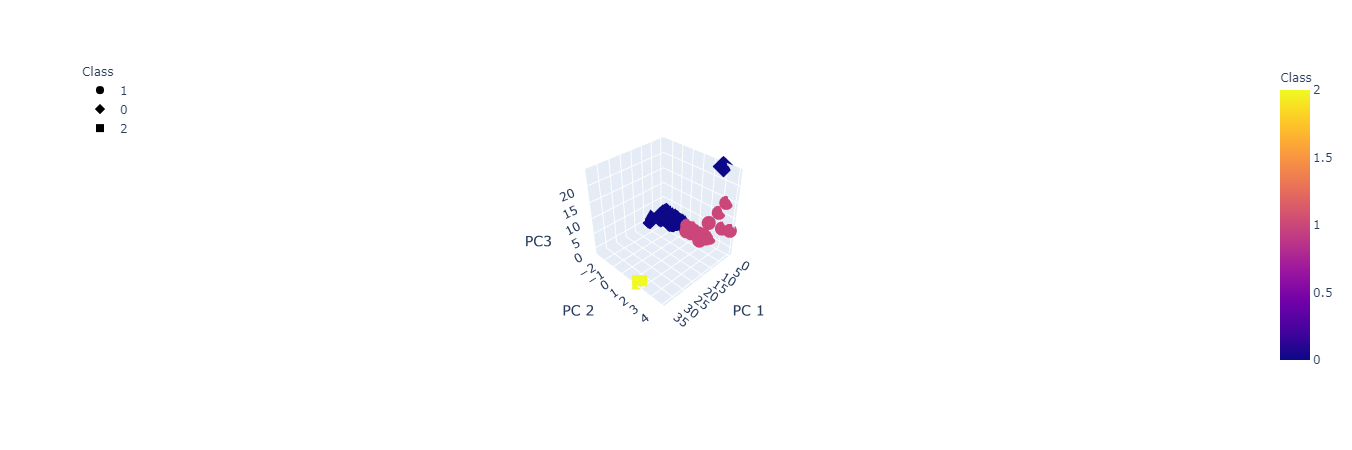

In [48]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC3",
    hover_name = "CoinName",
    hover_data = ["Algorithm"],
    color="Class",
    symbol="Class",
    width=300,
    
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


#### Table of Tradable Cryptocurrencies

In [49]:
# Table with tradable cryptos
tradable_crypto = clustered_df.hvplot.table(columns = ["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "Class"],
                                 sortable=True, selectable=True )
tradable_crypto

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [50]:
# Print the total number of tradable cryptocurrencies
print(tradable_crypto)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]


#### Scatter Plot with Tradable Cryptocurrencies

In [51]:
# Scale data to create the scatter plot
scaler = MinMaxScaler()




In [52]:
clustered_df[["TotalCoinsMined", "TotalCoinSupply"]] = scaler.fit_transform(clustered_df[["TotalCoinsMined", "TotalCoinSupply"]])
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC3,CoinName,Class
42,Scrypt,PoW/PoS,0.000000,4.200000e-11,-0.325685,1.038485,-0.475126,42 Coin,1
404,Scrypt,PoW/PoS,0.001066,5.320000e-04,-0.309051,1.038604,-0.475761,404Coin,1
1337,X13,PoW/PoS,0.029576,3.141593e-01,2.298189,1.630352,-0.674014,EliteCoin,1
BTC,SHA-256,PoW,0.000018,2.100000e-05,-0.139975,-1.294526,0.165092,Bitcoin,0
ETH,Ethash,PoW,0.000109,0.000000e+00,-0.157615,-2.001870,0.255811,Ethereum,0


In [53]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
clustered_df.hvplot.scatter(
    x = "TotalCoinsMined", 
    y = "TotalCoinSupply", 
    hover_cols=["CoinName"], 
    by="Class",
)


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)